# Exploratory data analysis on the bank marketing data set with Pandas and Seaborn

Import libraries (very important)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


Using Pandas the data set i.e. bank.csv is loaded using the command shown below:

In [2]:
bank_data = pd.read_csv("../input/bank-marketing-dataset/bank.csv")
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


A quick glance at the data set set reveals that there are 17 columns in total namely 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'deposit'.

The shape of the data set i.e the dimensions depicting the number of rows and columns is given by the command 'shape' in pandas as illustrated below. 
There are 11162 rows or records and 17 column or attributes in the bank data set.

In [3]:
bank_data.shape


(11162, 17)

Using the 'info' command, in-depth details about the attributes in the data set can be obtained. 
For example, in the bank data set used, 'age is a non-null attribute with type integer, 'job' 
is a non-null attribute with type object. Type object means that the attribute or variable is a categorical value.

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Using the 'describe' function from pandas, further details about the variables can be 
obtained, such as count, mean, standard deviation values and minimum and max values.

In [5]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


From the above output, we can make the following conclusions:
age: minimum age of the bank's client's is 18 while the maximum age is 95. The average age of the customers is 41.

balance: the mean customer balance is 1528.54, while the minimum balance is -6847.00. The maximum balance stands at 81204.00.

duration: the maximum duration in seconds of a single contact was 3881 seconds, while the shortest duration of a contact with a client lasted for 2 seconds.

campaign: the maximum number of contacts made in the campaign to a single client is 63 while the minimum number of contacts is 1. The average number of contacts made was 2.5

pdays: a maximum of 854 days passed by after a client was last contacted, while a minimum of -1 days passed by after a client was last contacted.

previous: a maximum of 58 contacts were made previously to a single client before the current campaign., while a minimum of 0 contacts were previously made.


Some specifics now…first we will look at how some variables relate to the target variable. 
Age and Deposit: there are more client between the ages of 0 and 40 who subscribed to the term deposit than 
those who did not.

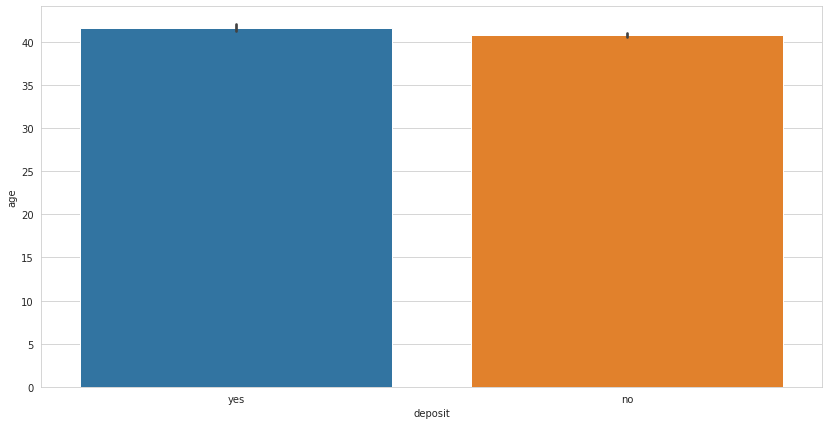

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.barplot(x=bank_data['deposit'], y=bank_data['age'])


Balance and Deposit: there are more clients with a balance between 0 and 1750 who 
subscribed to the term deposit than those who did not.

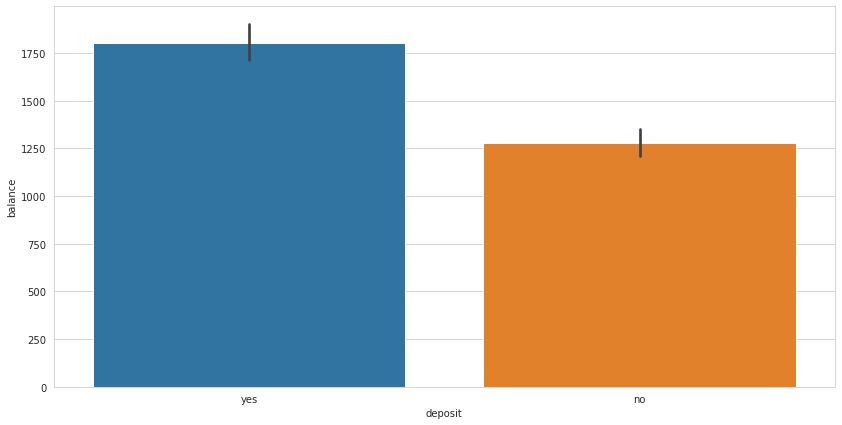

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.barplot(x=bank_data['deposit'], y=bank_data['balance'])

Campaign and Deposit: the are more clients who did subscribe to
the term deposit but had been contacted more than 20 times.

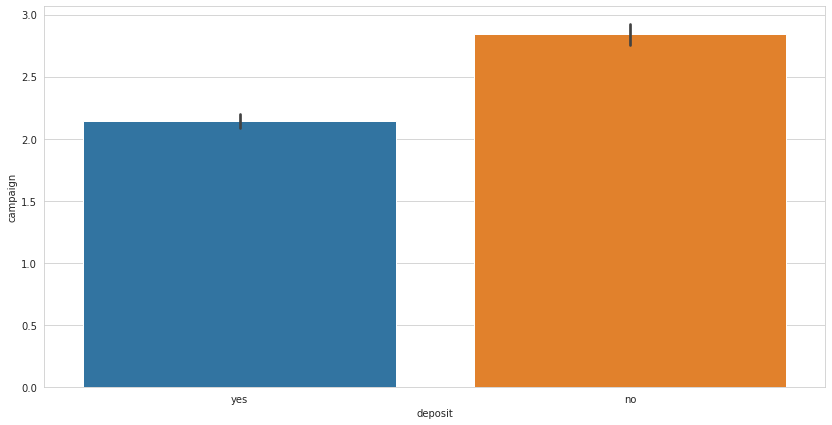

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.barplot(x=bank_data['deposit'], y=bank_data['campaign'])

Now let us look at some categorical variables. The categorical variables in our data set are shown below. We will use counplot from Seaborn to visualize our categorical variables.

In [9]:
s= (bank_data.dtypes =='object')
objectcols = list(s[s].index)
bank_data_object = bank_data[objectcols]
bank_data_object.head(5)


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


Job: from the visuals below, we can conclude that people with management jobs took part the most in the campaign.

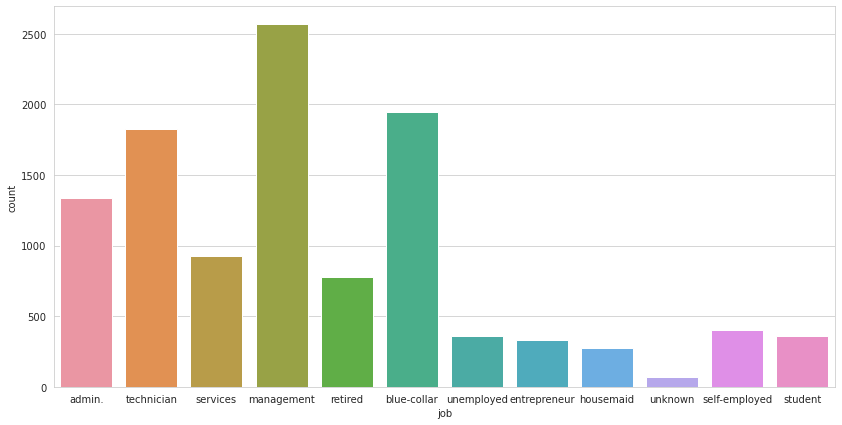

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(bank_data['job'])

Marital Status: there are more married people who took part in the campaign.

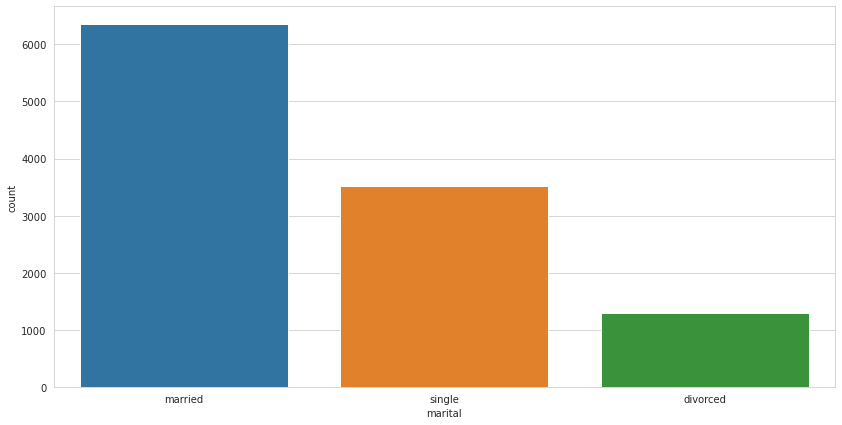

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(bank_data['marital'])

Education: there are more clients who had a secondary education who had taken part in the campaign.

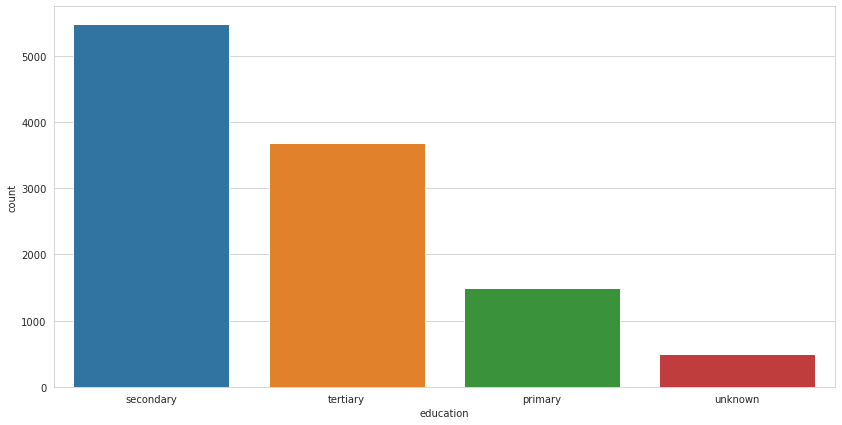

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(bank_data['education'])

Loan: most clients had not taken a personal loan.

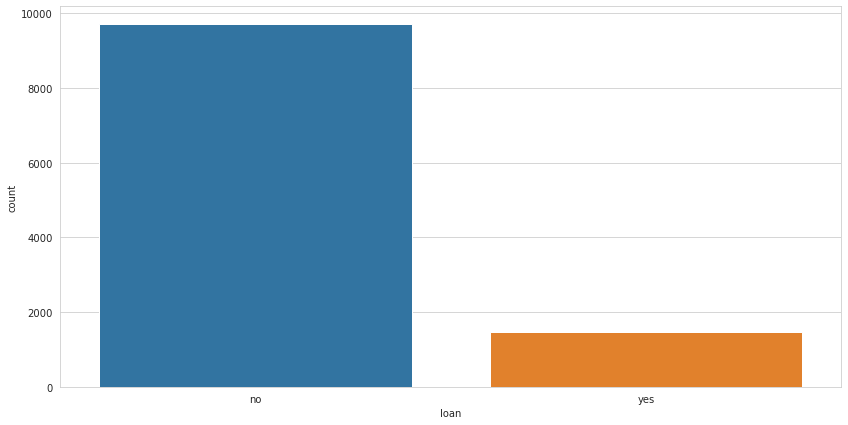

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(bank_data['loan'])

Housing: most clients did not have a housing loan.

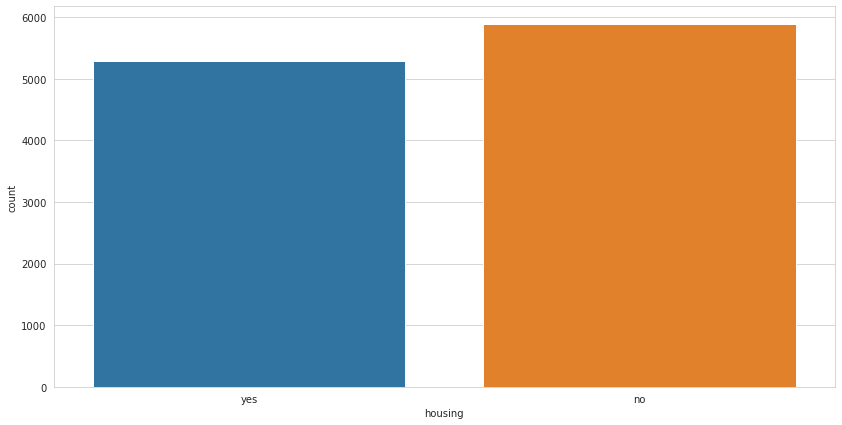

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(bank_data['housing'])

We can also use heatmaps to visualize the correlation between the numerical values.

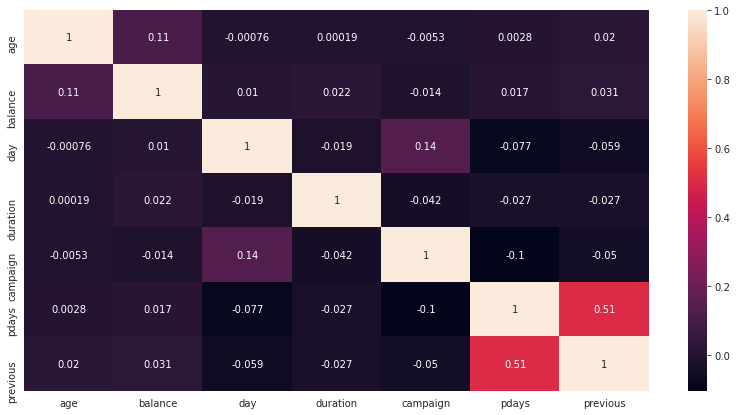

In [15]:
plt.figure(figsize=(14,7))
#sns.heatmap(data=df, annot=True)
cor = bank_data.corr()
sns.heatmap(cor, annot=True)
plt.show()

So was the campaign successful?. Well, out of 11162 records, there were 5289 subscriptions to the term deposit. 5873 clients did not subscribe. Not too bad.

In [16]:
(bank_data['deposit']=='yes').sum()

5289

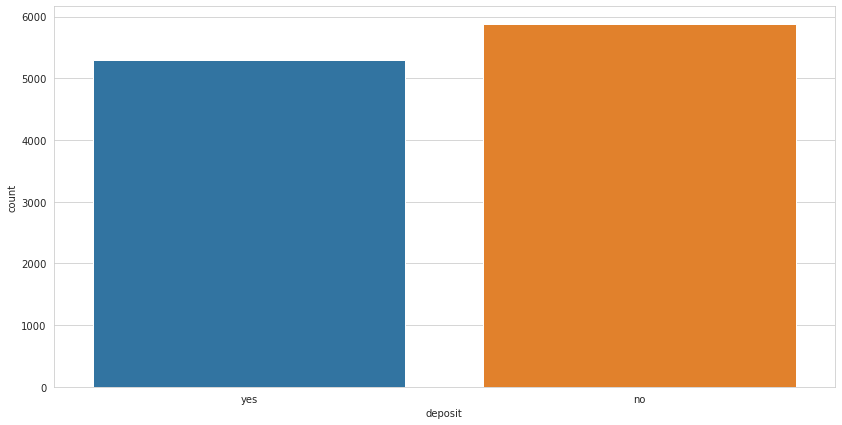

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(bank_data['deposit'])